# PyTorch Workflow

Lets explorer an example PyTorch end-to-end workflow.

Resources:
* Ground Truth notebook : Github link
* Book version of notebook -
* Ask a question -



In [10]:
what_were_covering = {1: "data (prepared and load)",
                      2: "build model",
                      3: "fitting the model to data (training)",
                      4: "making predictions and evaluating a model (inference)",
                      5: "saving and loading a model",
                      6: "putting it all togather"}

what_were_covering

{1: 'data (prepared and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all togather'}

In [11]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# check PyTorch version

torch.__version__

'2.3.0+cu121'

## Data (Praparing and Loading)

Data can be almost anything.... in machine learning
* Excel spreadsheet
* Images of any kind
* Videos (YouTube has lots of data...)
* Audio like songs and podcasts
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.

To showcase this, let's create some *known* data using the linear regression formula.

We'll use a linear regression formula to make a straight with *known* **parameters** .

In [12]:
# Create *known* parameters

weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step =0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]



(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [13]:
len(X), len(y)

(50, 50)

### Spliting Data into training and test sets (one of the most important concepts in machine learning in general)

Let's create a training and test with our data





In [14]:
# Create a train/test split

train_split = int(0.8*len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

This is where the data explorer's motto comes in!

"Visualize, visualize, visualize"

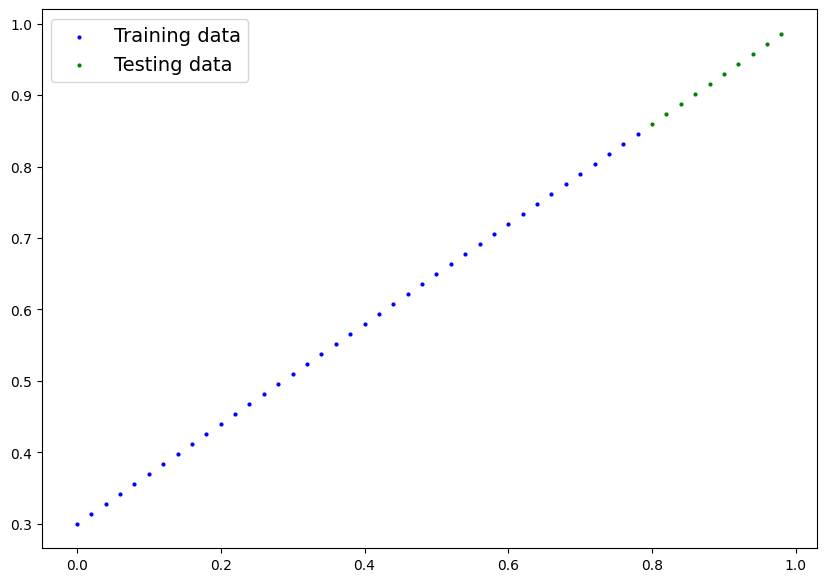

In [15]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue

  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # Are there predictions?

  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")


  # Show the legend
  plt.legend(prop={"size": 14})


plot_predictions()



## 2. Build Model

Our First PyTorch Model

This is very exciting.. lets do it!



What our model doeas:
* Start with random values (eight & bias)
* Look at the training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data)

How doeas it do so?

1. Gradient descent
2. Backpropogation



In [168]:
# Create a linear regression model class


class LinearRegressionModel(nn.Module): # almost everything in PyTorch inherits from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.rand(1,
                                           requires_grad=True,
                                           dtype=torch.float))
    self.bias = nn.Parameter(torch.rand(1,
                                           requires_grad=True,
                                           dtype=torch.float))

    # Forward method to define the computation in the model

  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.weights*x +self.bias




### PyTorch Model building block essentials

* torch.nn - contains all of the buildings for computational graphs( a neural network can be considered a computational graph)
* torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module -  Base call for all neural network modules, if you subclass it, you should overwrite forward()
* torch.optim - this where the optimizers in PyTorch live, they will help with gradient descent
* def forward() - All nn.Module subclasses require you to overwrite forward(), this methid defines what happens in the forward computation


### Checking the contents of our PyTorch Model

Now we've created a model, let's see what's inside...

So we can check our model parameters or what's inside our model using `.parameters()`

In [179]:
# Create a random seed

torch.manual_seed(42)

# Create an insatnce of the model (this is a subclass of nn.Module)

model_0 = LinearRegressionModel()

# check out parameters

list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [170]:
# list named parameters


model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [36]:
weight, bias

(0.7, 0.3)

### Making prediction using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` and `X_test`

When we pass data through our model, its going to run through the forward() method.



In [171]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [180]:
# Make predictions with model

with torch.inference_mode():
  y_preds = model_0(X_test)

#y_preds

# You can also do something similar with torch.no_grad(), however, torch.inference_mode() is preferred

# with torch.no_grad():
#   y_preds = model_0(X_test)

y_preds


tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]])

In [181]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

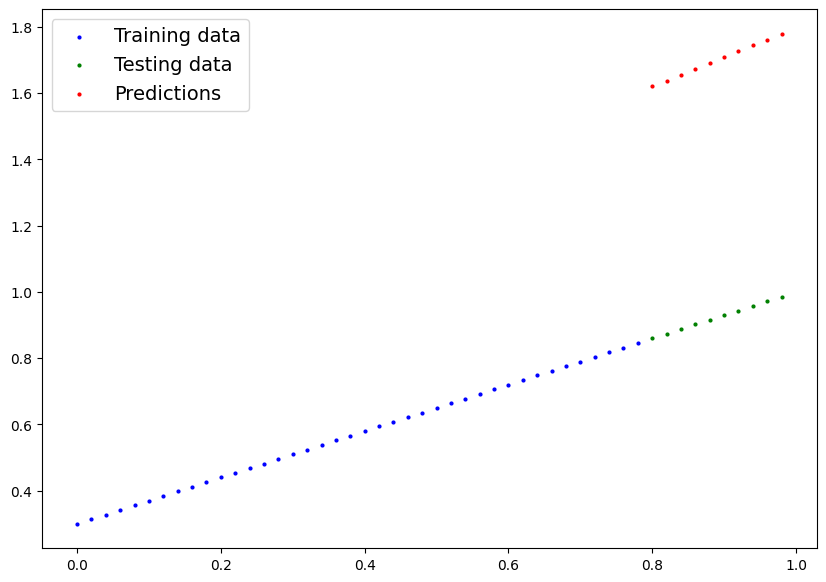

In [182]:
plot_predictions(predictions=y_preds)

## 3. Train the model

The whole idea of training is for a model to move from some unknown prarameters (these may be random ) to some known parameters

Or in other words from a poor reprensentation of the data to a better representation of the data.

One way to measure how poor or how wrong your models predictions are we use loss functions

* Note : Loss function may also be called cost function pr criterion in different areas. For our case, we're going to refer it as loss function

Things we need to train:

* **Loss function:** A function to measure how worng your model's predictions are to the ideal outputs

* **Oprimizer:** Takes into account the loss of a model and adjusts the models parameters(e.g. weight & bias in our case) to improve the loass function. https://pytorch.org/docs/stable/optim.html

** Indise the optimizer you'll often have to set two parameters:
*params - the model parameters you'd like to optimize for example params=model_0.parameters()
* lr(learning rate) - the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters with each stem (a small lr result in small changes , a large lr result in large changes)

And specifically for PyTorch, we need:

* A trianing loop
* A testing loop







In [174]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [62]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [183]:
# Setup a loass function

loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) # lr = learning rate



### Building a training loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:
0. Loop through the data
1. Forward pass (this involves data moving through our model's `forward()` function) to make predictions on data - also called forward propagation
2. Calculate the loss (compare forward pass prediction to the ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropogation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)



In [66]:
with torch.no_grad():
  list(model_0.parameters())

In [193]:
torch.manual_seed(42)
# an epoch is one loop through data... (This is hyperparameter because we've set it)

epochs = 1

### Training
# 0. Loop through the data

for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train mode in PyTorch

  # 1. Forward Pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss= loss_fn(y_pred, y_train)
  #print(f"Loss: {loss}")

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropogation
  loss.backward()

  # 5. Step to optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will accumilate through the loop so.. we have to zero them above in step 3

  model_0.eval() # turns off different settings in the model not needed for evaluation/testing (drop out layers / batch norms)

  with torch.inference_mode():

    # 1. Do the forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)
  if epoch % 10 ==0:
    print(f"Epoch: {epoch} | Loss : {loss} | Test loss: {test_loss}")

  # Print out model state dict()
  print(model_0.state_dict())


Loss: 0.0019509084522724152
Epoch: 0 | Loss : 0.0019509084522724152 | Test loss: 0.005930870771408081
OrderedDict([('weights', tensor([0.6977])), ('bias', tensor([0.3080]))])
Loss: 0.007095950655639172
OrderedDict([('weights', tensor([0.6938])), ('bias', tensor([0.2980]))])


In [194]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

y_preds_new

tensor([[0.8530],
        [0.8669],
        [0.8808],
        [0.8946],
        [0.9085],
        [0.9224],
        [0.9363],
        [0.9501],
        [0.9640],
        [0.9779]])

In [195]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

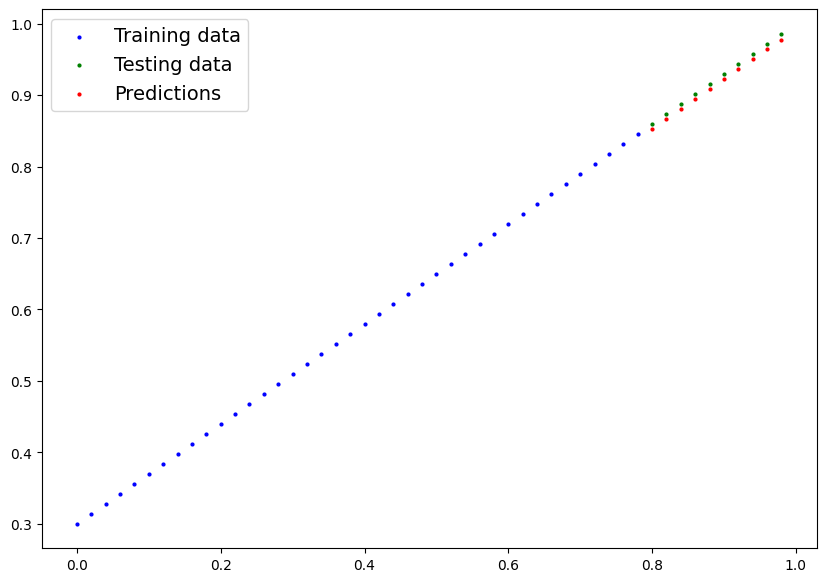

In [196]:
plot_predictions(predictions=y_preds_new)